In [273]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [274]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [275]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [276]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [277]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)

In [278]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Display sample data
df_market_data_scaled.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [279]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [280]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
    # 2. Fit the model to the data using `df_market_data_scaled`
    model.fit(df_market_data_scaled)
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(model.inertia_)

c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

In [281]:
print(f"k: {k}, inertia: {model.inertia_}")

k: 11, inertia: 24.116198421409194


In [282]:
# Check lengths of k_values and inertia
print(f"Length of k_values: {len(k_values)}")
print(f"Length of inertia: {len(inertia)}")

Length of k_values: 11
Length of inertia: 11


In [283]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

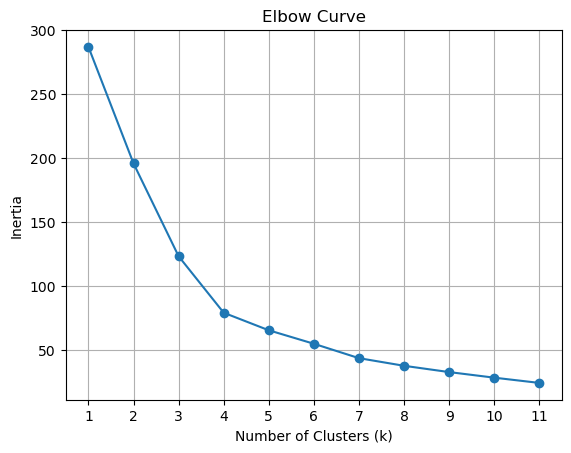

In [284]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [285]:
# Function to calculate silhouette scores for different k values
def calculate_silhouette_scores(df, k_values):
    silhouette_scores = {}
    for k in k_values:
        model = KMeans(n_clusters=k, random_state=42)
        labels = model.fit_predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores[k] = score
    return silhouette_scores

# Calculate silhouette scores for k values from 2 to 4
k_values_to_test = [2, 3, 4, 5]
silhouette_scores = calculate_silhouette_scores(df_market_data_scaled, k_values_to_test)

# Print silhouette scores
for k, score in silhouette_scores.items():
    print(f'Silhouette Score for k={k}: {score}')

# Choose the best k based on the highest silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f'Best k based on silhouette score: {best_k}')

c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

Silhouette Score for k=2: 0.6515760174981735
Silhouette Score for k=3: 0.7028216700527808
Silhouette Score for k=4: 0.3144817438146229
Silhouette Score for k=5: 0.2650551204437849
Best k based on silhouette score: 3


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 
based on Elbow Plot best_k is 4 or between 3 and 4
based on Silhouette Score best_k = 3

Elbow Plot: Helps narrow down the range of k values.
Silhouette Score: Provides a more precise measure of clustering quality within the selected range.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [286]:
# Initialize the K-Means model using the best value for k
best_k = 3
model = KMeans(n_clusters = best_k, random_state=42)

In [287]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [288]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predicted_clusters = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(predicted_clusters)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 2
 1 1 1 1]


In [289]:
# Create a copy of the DataFrame
clusters_df = df_market_data_scaled.copy()

In [290]:
# Add a new column to the DataFrame with the predicted clusters
clusters_df['clusters'] = predicted_clusters

# Display sample data
clusters_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [291]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = clusters_df.hvplot.scatter(x="price_change_percentage_24h", 
                           y="price_change_percentage_7d", 
                           by="clusters", 
                           hover_cols=['coin_id'])
scatter_plot

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [292]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [293]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_market_data_scaled)

# View the first five rows of the DataFrame. 
print(pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3']).head())

        PC1       PC2       PC3
0 -0.600667  0.842760  0.461595
1 -0.458261  0.458466  0.952877
2 -0.433070 -0.168126 -0.641752
3 -0.471835 -0.222660 -0.479053
4 -1.157800  2.041209  1.859715


In [294]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.3719856  0.34700813 0.17603793]


In [295]:
explained_variance = [0.3719856, 0.34700813, 0.17603793]
total_explained_variance = sum(explained_variance)
print(total_explained_variance)

0.89503166


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is approximately 0.89503166, which equals 89.5%.

In [296]:
# Create a new DataFrame with the PCA data.
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=df_market_data.index)


# Display sample data
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [297]:
# Create a list with the number of k-values from 1 to 11
k_values_pca = list(range(1, 12))

In [298]:
# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values_pca:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model_pca = KMeans(n_clusters=k, random_state=42)
    # 2. Fit the model to the data using `df_market_data_pca`
    model_pca.fit(pca_df)
    # 3. Append the model.inertia_ to the inertia list
    inertia_pca.append(model_pca.inertia_)


c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

In [299]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values_pca, 'inertia': inertia_pca}
# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_df = pd.DataFrame(elbow_data_pca)

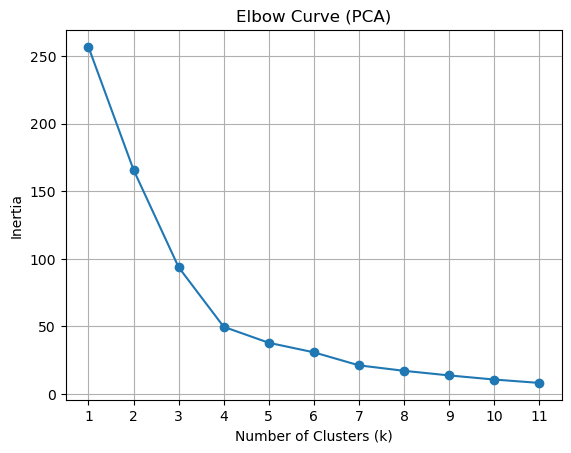

In [300]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_pca_df['k'], elbow_pca_df['inertia'], marker='o')
plt.title('Elbow Curve (PCA)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [301]:
# Function to calculate silhouette scores for different k values
def calculate_silhouette_scores(df, k_values):
    silhouette_scores = {}
    for k in k_values:
        model = KMeans(n_clusters=k, random_state=42)
        labels = model.fit_predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores[k] = score
    return silhouette_scores

# Calculate silhouette scores for k values from 2 to 4
k_values_to_test = [2, 3, 4, 5]
silhouette_scores = calculate_silhouette_scores(pca_df, k_values_to_test)

# Print silhouette scores
for k, score in silhouette_scores.items():
    print(f'Silhouette Score for k={k}: {score}')

# Choose the best k based on the highest silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f'Best k based on silhouette score: {best_k}')

c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks

Silhouette Score for k=2: 0.6930355583332265
Silhouette Score for k=3: 0.7415086658662887
Silhouette Score for k=4: 0.42079973016648503
Silhouette Score for k=5: 0.39368152262700823
Best k based on silhouette score: 3


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k for the PCA data is 3.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, the best k value is the same (3) for both the original data and the PCA data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [302]:
# Initialize the K-Means model using the best value for k
best_k_pca = 3
model_pca = KMeans(n_clusters=best_k_pca, random_state=42)

In [303]:
# Fit the K-Means model using the PCA data
model_pca.fit(pca_df)

c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Anaconda3\envs\dev\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [304]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = model_pca.predict(pca_df)
# Print the resulting array of cluster values.
print(clusters_pca)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1
 0 0 0 0]


In [305]:
# Create a copy of the DataFrame with the PCA data
pca_clusters_df = pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_clusters_df['cluster'] = clusters_pca

# Display sample data
pca_clusters_df.head()

,PC1,PC2,PC3,cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [306]:

# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot_pca = pca_clusters_df.hvplot.scatter(x="PC1", 
                               y="PC2", 
                               by="cluster", 
                               hover_cols=['index'])

scatter_plot_pca

:NdOverlay   [cluster]
   :Scatter   [PC1]   (PC2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [307]:
# Composite plot to contrast the Elbow curves
elbow_composite_plot = elbow_df.hvplot.line(
    x='k',
    y='inertia',
    label='Original Data'
) + elbow_pca_df.hvplot.line(
    x='k',
    y='inertia',
    label='PCA Data'
)
elbow_composite_plot

:Layout
   .Curve.Original_Data :Curve   [k]   (inertia)
   .Curve.PCA_Data      :Curve   [k]   (inertia)

In [308]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
scatter_composite_plot = scatter_plot + scatter_plot_pca
scatter_composite_plot

:Layout
   .NdOverlay.I  :NdOverlay   [clusters]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [cluster]
      :Scatter   [PC1]   (PC2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** 
  After visually analyzing the cluster analysis results, here are the impacts of using fewer features to cluster the data using K-Means:

Impact Analysis
Original Data Clustering:

Visualization: The left scatter plot shows the clustering using the original data with three clusters (k=3).
Observation: There is considerable overlap among clusters, indicating that the clusters are not well-separated. Some data points appear to be in transition zones between clusters, which could lead to ambiguity in classification.
PCA Data Clustering:

Visualization: The right scatter plot shows the clustering using PCA-transformed data with three clusters (k=3).
Observation: The clusters in the PCA-transformed data appear more compact and better separated compared to the original data. However, the reduction to three principal components might have oversimplified the data, leading to a loss of nuanced information.